In [1]:
# IBM Watson Machine Learning is used to deploy LSTM model towards end of notebook

!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [2]:
#import libraries
import math
import pandas as pd
import numpy as np
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
df_emission= pd.DataFrame(pd.read_csv("/content/daily emissions.xlsx")).set_index("Date")

In [4]:
df_emission.head()

,China
Date,
2017-01-03,53.040001
2017-01-04,53.720001
2017-01-05,53.689999
2017-01-06,54.490002
2017-01-09,54.180000


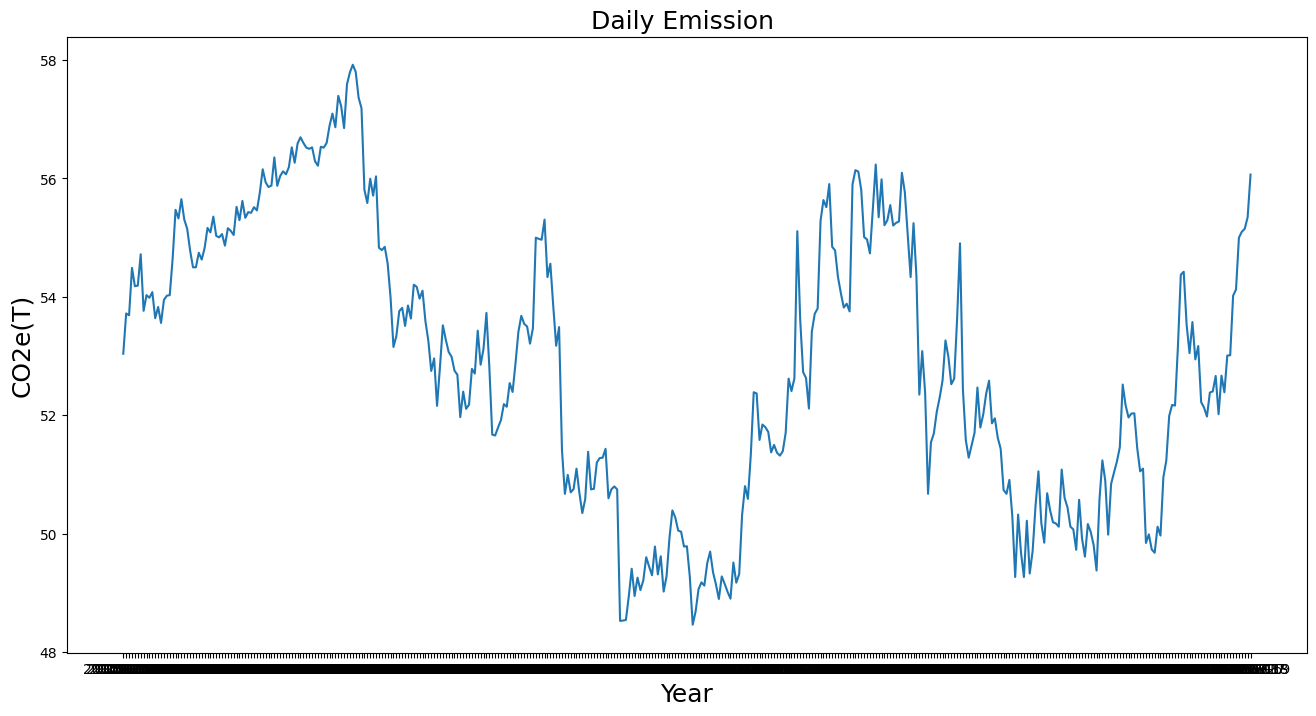

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df_emission)
plt.title('Daily Emission ',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.ylabel('CO2e(T)',fontsize=18)
plt.show()


In [6]:
df_emission.values

array([[53.04000092],
       [53.72000122],
       [53.68999863],
       [54.49000168],
       [54.18000031],
       [54.18999863],
       [54.72000122],
       [53.76499939],
       [54.02999878],
       [53.98500061],
       [54.08000183],
       [53.63999939],
       [53.83000183],
       [53.56000137],
       [53.95000076],
       [54.02000046],
       [54.02999878],
       [54.65000153],
       [55.47000122],
       [55.32500076],
       [55.65000153],
       [55.30500031],
       [55.15000153],
       [54.78499985],
       [54.5       ],
       [54.5       ],
       [54.74499893],
       [54.63000107],
       [54.82500076],
       [55.16500092],
       [55.09000015],
       [55.35499954],
       [55.02999878],
       [55.00500107],
       [55.06000137],
       [54.86500168],
       [55.15999985],
       [55.11500168],
       [55.04499817],
       [55.52000046],
       [55.29499817],
       [55.61999893],
       [55.33499908],
       [55.43000031],
       [55.41999817],
       [55

In [7]:
data_set=df_emission.values
demand_correlation=3.7
training_data_len = math.ceil(len(data_set)*0.8)
training_data_len

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_set)

training_data = scaled_data[:training_data_len,:]
x_train = []
y_train = []

for i in range(60,len(training_data)):
  x_train.append(training_data[i-60:i,0])
  y_train.append(training_data[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [8]:
#Build Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',
              loss='mse')

In [9]:
#train model

model.fit(x_train,y_train,epochs=6,batch_size=1)

Epoch 1/6
252/252 [==============================] - 19s 61ms/step - loss: 0.0192
Epoch 2/6
252/252 [==============================] - 21s 83ms/step - loss: 0.0127
Epoch 3/6
252/252 [==============================] - 14s 54ms/step - loss: 0.0105
Epoch 4/6
252/252 [==============================] - 9s 35ms/step - loss: 0.0090
Epoch 5/6
252/252 [==============================] - 7s 28ms/step - loss: 0.0071
Epoch 6/6
252/252 [==============================] - 9s 34ms/step - loss: 0.0062


In [10]:
#generate test data

test_data = scaled_data[training_data_len-60:,:]

x_test=[]
y_test=scaled_data[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(77, 60, 1)

In [11]:
#predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(y_test-predictions)**2)
rmse


3/3 [==============================] - 1s 16ms/step


51.57921731355945

<ipython-input-12-f9f7af0319fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


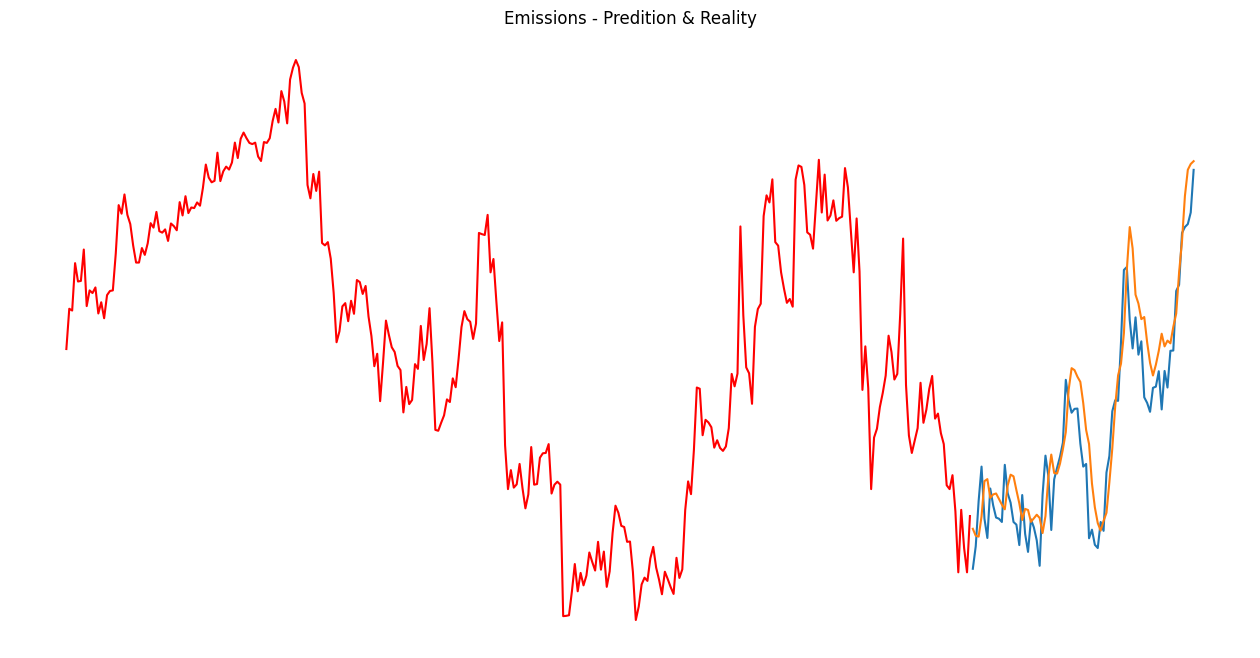

In [12]:
trainig = df_emission[:training_data_len]
valid = df_emission[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Emissions - Predition & Reality')
plt.xlabel('Year')
plt.ylabel('CO2e(T)')
plt.plot(trainig['China'], c='r')
plt.axis('off')
plt.plot(valid[['China','Predictions']])

### Installing IBM Dependencies



In [ ]:
!pip install -U ibm-watson-machine-learning

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

### Authentication

In [ ]:
wml_credentials = {
    "apikey":"",
    "url":""
}

In [ ]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

In [ ]:
SPACE_ID="SPACEID"

In [ ]:
wml_client.set.default_space(SPACE_ID)

###Save + deploy

In [ ]:
MODEL_NAME = 'LSTM Forcast'
DEPLOYMENT_NAME = 'LSTM Deployment'
BEST_MODEL = model


In [ ]:
pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.7')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'tensorflow_2.13',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

#Save model
model_details = wml_client.repository.store_model(
    model=BEST_MODEL,
    meta_props=model_props,
    training_data=X_train.head(),
    training_target=y_train.head()
)


In [ ]:
model_uid = wml_client.repository.get_model_uid(model_details);
model_uid

In [ ]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid,
    meta_props=deployment_props
)

# Output result
deployment